## Exploratory commands

Getting to know key open-source libraries and their API calls

We will start with the famous HuggingFace `datasets` library
- [Dataset reference](https://huggingface.co/docs/datasets/v1.1.2/loading_datasets.html)

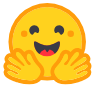 HuggingFace Hub 
- [Models](https://huggingface.co/models)
- [Datasets](https://huggingface.co/datasets)

In [6]:
!pip install datasets

In [2]:
from datasets import load_dataset
from datasets import list_datasets

In [3]:
datasets_list = list_datasets()
len(datasets_list)

76796

In [6]:
print(', '.join(dataset for dataset in datasets_list[:10]))

acronym_identification, ade_corpus_v2, adversarial_qa, aeslc, afrikaans_ner_corpus, ag_news, ai2_arc, air_dialogue, ajgt_twitter_ar, allegro_reviews


In [8]:
# Let's get the SQuAD dataset (Stanford QA Dataset)
squad_dataset = load_dataset('squad')

  0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
print(type(squad_dataset))
squad_dataset

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [12]:
# Get just the training split
squad_dataset_train = load_dataset('squad', split='train')
print(type(squad_dataset_train))

<class 'datasets.arrow_dataset.Dataset'>


### Selecting a configuration

From the docs: Some datasets comprise several configurations. A Configuration define a sub-part of a dataset which can be selected. Unlike split, you have to select a single configuration for the dataset, you cannot mix several configurations. Examples of dataset with several configurations are:

* The GLUE dataset which is an agregated benchmark comprised of 10 subsets: COLA, SST2, MRPC, QQP, STSB, MNLI, QNLI, RTE, WNLI and the diagnostic subset AX.
* The wikipedia dataset which is provided for several languages.

In [14]:
# Selecting a configuration is done by providing datasets.load_dataset() with a name argument. Here is an example for GLUE, which we use in one of our labs
from datasets import load_dataset

# This gives an error because configuration is missing
# dataset = load_dataset('glue') 

glue_sst2 = load_dataset('glue', 'sst2')
print(glue_sst2)

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})


## 🤗 Transformers library
About: "Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets and then share them with the community on our model hub. At the same time, each python module defining an architecture is fully standalone and can be modified to enable quick research experiments."

* [PyPI](https://pypi.org/project/transformers/)
* [Docs](https://huggingface.co/docs/transformers/index)
* Import: `from transformers import AutoTokenizer, DataCollatorWithPadding`